In [1]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import sys
sys.path.append('/public/home/mowp/workspace/mowp_scripts/tools/metaplot')

In [3]:
%load_ext autoreload
%autoreload 1
%aimport metaplot

In [4]:
# load gene_list

%store -r output_res
all_gene = set(output_res['gene_id'])

# H3K4me3

## raw data

In [6]:
treatment = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K4me3_ChIPseq_GSM4275144.sorted.rmdup.CPM.bw'
control = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_input_ChIPseq_GSM4275149.sorted.rmdup.CPM.bw'
tss_cov, pas_cov, sum_cov = metaplot.get_bw_meta_result(treatment, all_gene)
input_tss_cov, input_pas_cov, input_sum_cov = metaplot.get_bw_meta_result(control, all_gene)

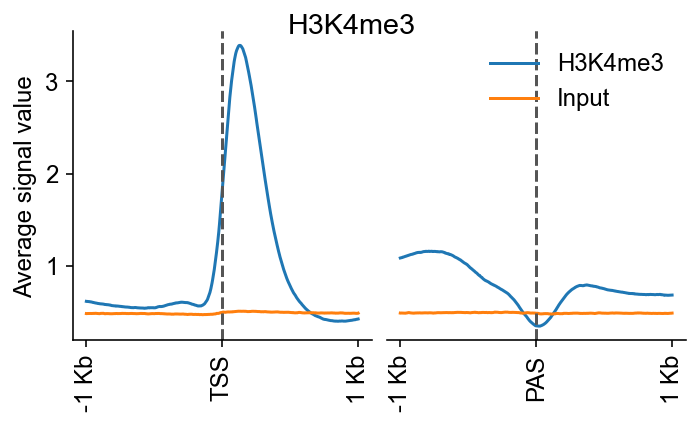

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], tss_cov, sum_cov, target_site='TSS', ylabel='Average signal value')
metaplot.plot(ax[1], pas_cov, sum_cov, target_site='PAS', label='H3K4me3')

metaplot.plot(ax[0], input_tss_cov, input_sum_cov, target_site='TSS', ylabel='Average signal value')
metaplot.plot(ax[1], input_pas_cov, input_sum_cov, target_site='PAS', label='Input')

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('H3K4me3');

## ChIP/input

In [9]:
infile = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/col_H3K4me3_ChIPseq_GSM4275144.compare.bw'
tss_cov, pas_cov, sum_cov = metaplot.get_bw_meta_result(infile, all_gene)

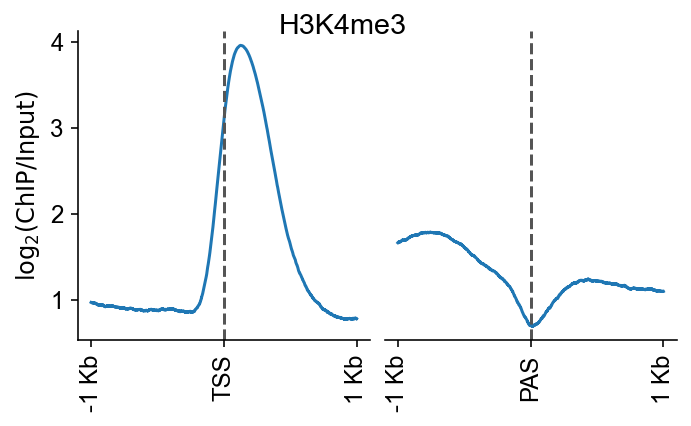

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], tss_cov, sum_cov, target_site='TSS', ylabel='$\mathrm{log_{2} (ChIP/Input)}$')
metaplot.plot(ax[1], pas_cov, sum_cov, target_site='PAS')

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('H3K4me3');

# Pol II

## ChIP data

In [12]:
treatment = '/public/home/mowp/data/public_data/epigentics_data/AGO1_GSM2522247/RNAP2_rep1_GSE95301/bw_files/PolII_WT_ChIP_rep1.sorted.rmdup.CPM.bw'
control = '/public/home/mowp/data/public_data/epigentics_data/AGO1_GSM2522247/RNAP2_rep1_GSE95301/bw_files/PolII_WT_input_rep1.sorted.rmdup.CPM.bw'
tss_cov, pas_cov, sum_cov = metaplot.get_bw_meta_result(treatment, all_gene)
input_tss_cov, input_pas_cov, input_sum_cov = metaplot.get_bw_meta_result(control, all_gene)

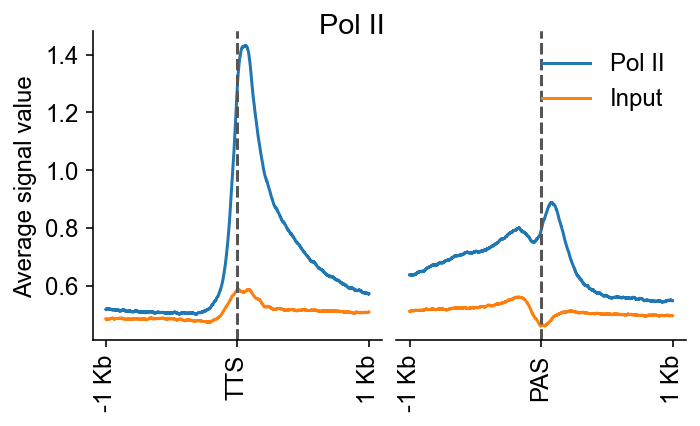

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], tss_cov, sum_cov, target_site='TSS', ylabel='Average signal value')
metaplot.plot(ax[1], pas_cov, sum_cov, target_site='PAS', label='Pol II')

metaplot.plot(ax[0], input_tss_cov, input_sum_cov, target_site='TTS', ylabel='Average signal value')
metaplot.plot(ax[1], input_pas_cov, input_sum_cov, target_site='PAS', label='Input')

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('Pol II');

## ChIP/input

In [15]:
treatment = '/public/home/mowp/data/public_data/epigentics_data/AGO1_GSM2522247/RNAP2_rep2_GSE95301/PolII_WT_ChIP_rep2.compare.bw'
tss_cov, pas_cov, sum_cov = metaplot.get_bw_meta_result(treatment, all_gene)

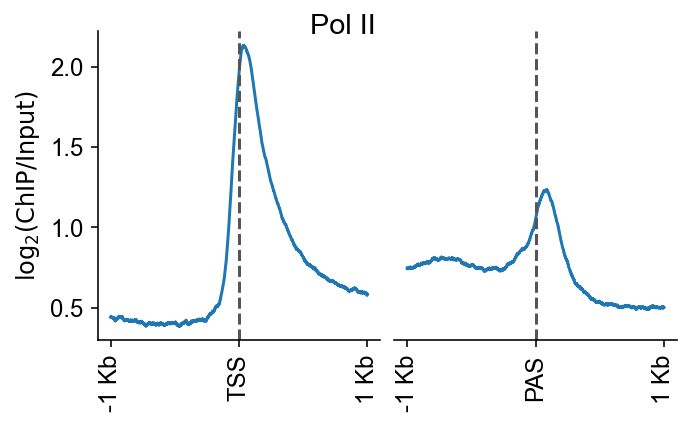

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], tss_cov, sum_cov, target_site='TSS', ylabel='$\mathrm{log_{2} (ChIP/Input)}$')
metaplot.plot(ax[1], pas_cov, sum_cov, target_site='PAS')

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('Pol II');

# FLEP-seq

## non-polya reads

In [34]:
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
wt_tss_cov, wt_pas_cov, wt_n = metaplot.get_bam_meta_result(infile, all_gene, before=1000, after=1000)

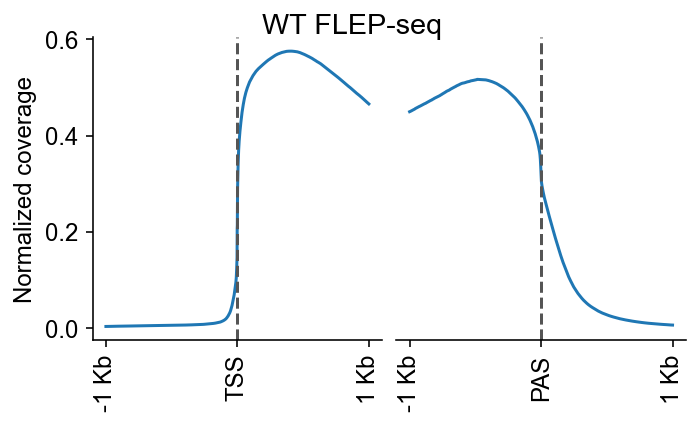

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], wt_tss_cov, wt_n, target_site='TSS', ylabel='Normalized coverage', before=1000, after=1000)
metaplot.plot(ax[1], wt_pas_cov, wt_n, target_site='PAS', before=1000, after=1000)

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('WT FLEP-seq');

## polya reads

In [36]:
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
wt_tss_cov, wt_pas_cov, wt_n = metaplot.get_bam_meta_result(infile, all_gene, before=1000, after=1000)

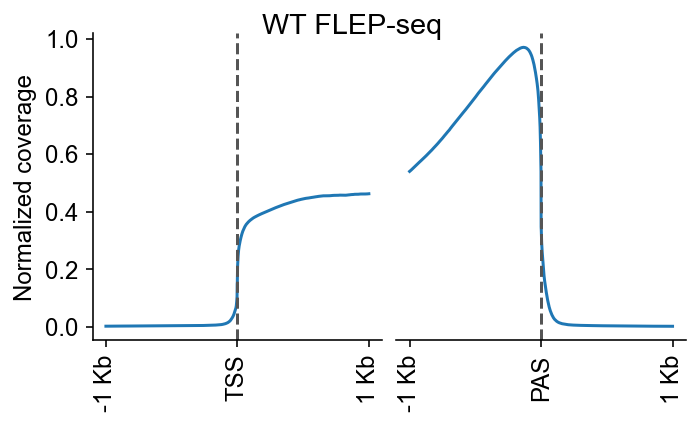

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)

metaplot.plot(ax[0], wt_tss_cov, wt_n, target_site='TSS', ylabel='Normalized coverage', before=1000, after=1000)
metaplot.plot(ax[1], wt_pas_cov, wt_n, target_site='PAS', before=1000, after=1000)

ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_ticks_position('none')

plt.setp(ax[1].get_yticklabels(), visible=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.suptitle('WT FLEP-seq');